In [15]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [16]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

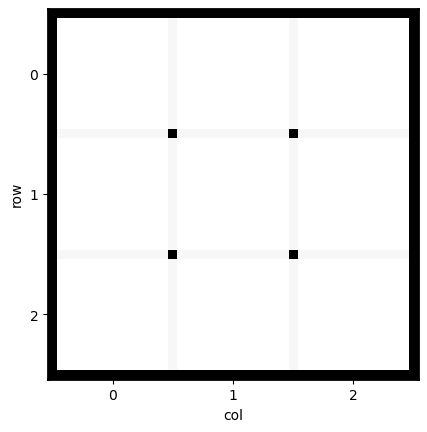

In [17]:
dataset.show_maze(0)

In [18]:

train = trainer.Maze_Training(name = 'test',
                              maze_dataset = dataset,
                              len_game=100,
                              n_agents=1,
                              vision = 3,
                              action_type='cardinal',
                              gamma = 0.99,
                              tau = 0.01,
                              batch_size = 32,
                              n_frames = 100000,
                              lr = 0.00025,
                              )
train.train()
train.save()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


frame 10000 with loss 239.54090881347656
frame 20000 with loss 63.69633483886719
frame 30000 with loss 33.264156341552734
frame 40000 with loss 41.5059700012207
frame 50000 with loss 44.76961135864258
frame 60000 with loss 10.602481842041016
frame 70000 with loss 16.21302032470703
frame 80000 with loss 14.69575309753418
frame 90000 with loss 32.126399993896484
frame 100000 with loss 17.657901763916016


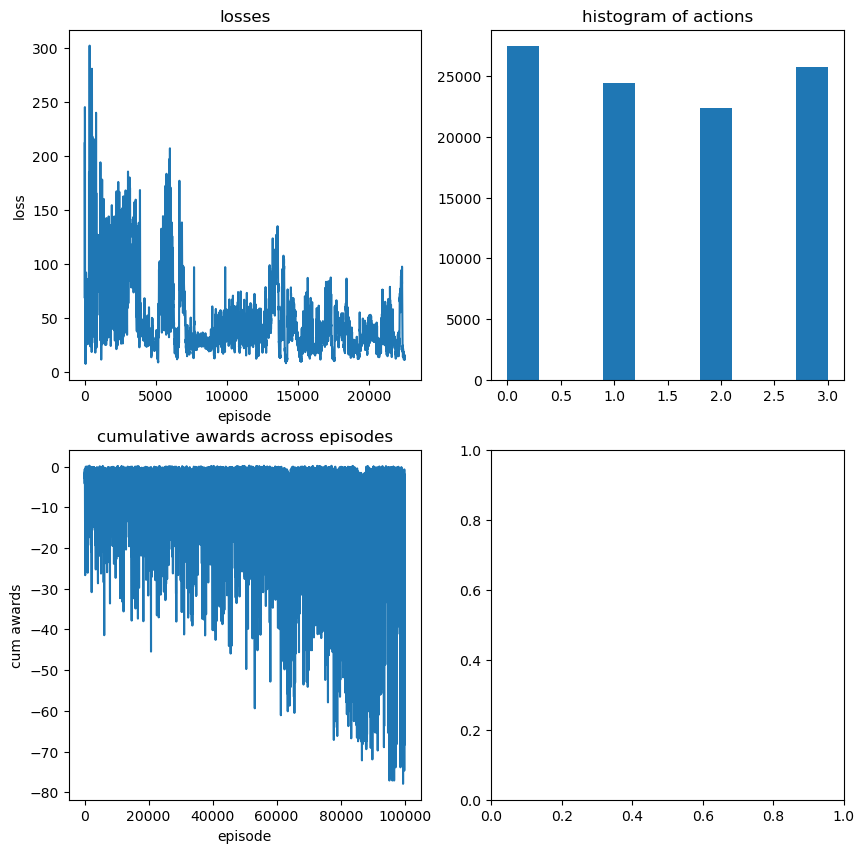

In [19]:
train.results()

In [58]:
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False)


cumulative reward: [0.92]


In [21]:
import DQN.agent as agent

load = agent.CNN_Maze_Agents(3)
load.load('version_1')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:313: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.Q_fun.load_state_dict(torch.load(os.path.join(fd,

RuntimeError: Error(s) in loading state_dict for CNN_Q_fun:
	Missing key(s) in state_dict: "CNN_function.0.weight", "CNN_function.0.bias", "CNN_function.2.weight", "CNN_function.2.bias", "CNN_function.5.weight", "CNN_function.5.bias", "global_function.0.weight", "global_function.0.bias", "global_function.2.weight", "global_function.2.bias", "final_function.0.weight", "final_function.0.bias", "final_function.2.weight", "final_function.2.bias", "final_function.4.weight", "final_function.4.bias". 
	Unexpected key(s) in state_dict: "Q_function.0.weight", "Q_function.0.bias", "Q_function.0.running_mean", "Q_function.0.running_var", "Q_function.0.num_batches_tracked", "Q_function.1.weight", "Q_function.1.bias", "Q_function.3.weight", "Q_function.3.bias", "Q_function.6.weight", "Q_function.6.bias", "Q_function.8.weight", "Q_function.8.bias", "Q_function.10.weight", "Q_function.10.bias". 

In [7]:
load.run_agent(dataset.__getitem__(0),len_game=20)

cumulative reward: [-676]
